In [1]:
import sys
sys.path.insert(0, '..')
%load_ext autoreload
%autoreload 2
%aimport std_func

# Hide warnings
import warnings
warnings.filterwarnings("ignore")

## Estimates from Sample Covariance

The portfolios we constructed in this notebook serve as reference to the portfolios using cosine similarity estimates and factor model estimates. Here, we simply use the sample return and sample covariance to generate portfolios for each industry.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
r_selected = pd.read_csv("data/filtered_r.csv")
# get the mean of all 
r_selected.set_index("name", inplace = True)
mu = r_selected.mean(axis = 1)
# compute the covariance matrix 
cov = r_selected.T.cov()

### Perform Mean-Variance Analysis
We will use one industry per time to generate a minimum-variance portfolio. In our demonstration of mean-variance analysis process, we use the industry `pharmaceutical preparations` whose SIC code is `2834`. At the end, we will show the results for other industries. 

We first get the name list of `pharmaceutical preparations` companies and match the names with the companies in returns data. Then, we get the sample mean and sample covariance for this specific industry. We get the efficient frontier, the set of optimal portfolios, for the industry; and recognize the minimum-variance portfolio with its performance and its weights for selected companies.

In [4]:
#!pip install dataframe_image

In [5]:
!pip install PyPortfolioOpt

In [6]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import objective_functions
from pypfopt import plotting

In [7]:
df = pd.read_csv('../data/preprocessed.csv',
                 usecols = ['reportingDate', 'name', 'CIK',
                           'coDescription_stopwords', 'SIC', 'SIC_desc'])
df = df.set_index(df.name)

In [8]:
# get the names of the companies in the pharmaceutical preparations industry
Pharm = df[df.SIC == 2834]
Pharm_list = Pharm.index

In [9]:
# get the companies name that match return data and business description data
SET = (set(Pharm_list) & set(r_selected.index))
LIST = [*SET, ]

#### Sample Mean for the Pharmaceutical Preparations Industry

In [10]:
mu_Pharm = mu[LIST]
mu_Pharm

name
MARINUS PHARMACEUTICALS INC       0.044790
ARDELYX, INC.                    -0.027414
SYNDAX PHARMACEUTICALS INC       -0.010075
BELLEROPHON THERAPEUTICS, INC.    0.034770
ONCOSEC MEDICAL INC              -0.009135
                                    ...   
ANI PHARMACEUTICALS INC          -0.000895
ARENA PHARMACEUTICALS INC         0.032450
LILLY ELI & CO                    0.017574
LEXICON PHARMACEUTICALS, INC.    -0.013984
PROPHASE LABS, INC.               0.038154
Length: 124, dtype: float64

#### Sample Covariance for the Pharmaceutical Preparations Industry

In [11]:
tmp = cov[LIST].T
cov_Pharm = tmp[LIST]
cov_Pharm

name,MARINUS PHARMACEUTICALS INC,"ARDELYX, INC.",SYNDAX PHARMACEUTICALS INC,"BELLEROPHON THERAPEUTICS, INC.",ONCOSEC MEDICAL INC,IRONWOOD PHARMACEUTICALS INC,CATABASIS PHARMACEUTICALS INC,"ARATANA THERAPEUTICS, INC.",LIPOCINE INC.,AMICUS THERAPEUTICS INC,...,FLEXION THERAPEUTICS INC,TONIX PHARMACEUTICALS HOLDING CORP.,"CONCERT PHARMACEUTICALS, INC.","VALEANT PHARMACEUTICALS INTERNATIONAL, INC.",INTERCEPT PHARMACEUTICALS INC,ANI PHARMACEUTICALS INC,ARENA PHARMACEUTICALS INC,LILLY ELI & CO,"LEXICON PHARMACEUTICALS, INC.","PROPHASE LABS, INC."
name,,,,,,,,,,,,,,,,,,,,,
MARINUS PHARMACEUTICALS INC,0.116634,0.025617,0.016206,0.023100,0.005494,0.008827,0.042373,0.006448,0.020774,0.024469,...,0.025724,0.016549,0.019293,0.025474,0.000347,0.013062,0.021448,0.005194,0.012878,0.006418
"ARDELYX, INC.",0.025617,0.036588,0.004957,0.008931,0.009870,0.010816,0.004086,0.005668,0.006915,0.006035,...,0.010494,-0.009285,0.008503,0.001376,0.006188,0.012324,0.007081,0.002531,0.013115,0.002632
SYNDAX PHARMACEUTICALS INC,0.016206,0.004957,0.054678,0.017720,0.003684,0.009630,0.010427,0.005239,-0.002029,0.015773,...,0.005458,-0.004880,0.004678,0.011172,0.010470,-0.004328,0.005928,0.001462,0.007552,0.010789
"BELLEROPHON THERAPEUTICS, INC.",0.023100,0.008931,0.017720,0.100098,0.011515,0.008409,-0.026654,-0.004736,-0.006175,0.007417,...,0.009128,0.005678,0.003968,0.012967,0.005544,0.008724,0.007723,0.007017,0.006687,-0.001862
ONCOSEC MEDICAL INC,0.005494,0.009870,0.003684,0.011515,0.050130,0.002052,-0.005080,0.001973,-0.000488,0.004246,...,0.002549,0.014485,0.008176,0.012503,0.000193,0.005435,0.000267,0.000505,0.001329,0.003093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ANI PHARMACEUTICALS INC,0.013062,0.012324,-0.004328,0.008724,0.005435,0.005296,0.002830,0.003584,0.002226,0.002902,...,0.005750,0.003201,0.000180,0.004822,0.003361,0.010194,0.005846,0.001520,0.007183,0.000473
ARENA PHARMACEUTICALS INC,0.021448,0.007081,0.005928,0.007723,0.000267,0.004125,0.008182,0.002912,0.005620,0.008793,...,0.007623,-0.000497,0.002774,0.009791,0.004564,0.005846,0.016468,0.000858,0.007858,0.000782
LILLY ELI & CO,0.005194,0.002531,0.001462,0.007017,0.000505,0.001707,-0.001207,0.002572,0.001717,0.000750,...,0.002625,-0.001009,0.000922,0.002161,0.003450,0.001520,0.000858,0.003017,0.002664,-0.000649


#### Efficient Frontier - Pharmaceutical Preparations

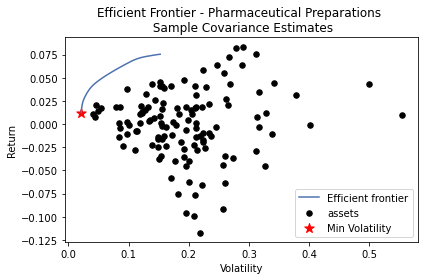

In [12]:
ef1 = EfficientFrontier(mu_Pharm, cov_Pharm, weight_bounds=(0, 0.2))

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef1, ax=ax, show_assets=True)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu_Pharm, cov_Pharm, weight_bounds=(0, 0.2))
# min volatility
ef2.min_volatility()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")

# Format
ax.set_title("Efficient Frontier - Pharmaceutical Preparations \n Sample Covariance Estimates")
ax.legend()
plt.tight_layout()
plt.savefig('images/Efficient_Frontier_Returns.png', dpi=200, bbox_inches='tight')
plt.show()

##### Min Volatility Portfolio

###### Performance

In [13]:
ef2.portfolio_performance(verbose=True);

Expected annual return: 1.2%
Annual volatility: 2.1%
Sharpe Ratio: -0.35


###### Weights

In [14]:
companies = []
weights = []
for company, weight in ef2.clean_weights().items():
    if weight != 0:
        companies.append(company)
        weights.append(weight)
        
dic = {'Company_Name':companies,'Weight':weights}
min_vol = pd.DataFrame(dic)
min_vol.to_csv("data/min_vol_sample_Pharmaceutical_Preparations.csv", index = False)

In [15]:
pd.read_csv("data/min_vol_sample_Pharmaceutical_Preparations.csv")

,Company_Name,Weight
0,"ARATANA THERAPEUTICS, INC.",0.03678
1,LIPOCINE INC.,0.00683
2,BIODELIVERY SCIENCES INTERNATIONAL INC,0.03680
3,"CYTOMX THERAPEUTICS, INC.",0.00520
4,ORAMED PHARMACEUTICALS INC.,0.04982
5,"HEAT BIOLOGICS, INC.",0.00297
6,PFENEX INC.,0.03777
7,VTV THERAPEUTICS INC.,0.02372
8,XENON PHARMACEUTICALS INC.,0.01350
9,STEMLINE THERAPEUTICS INC,0.04273


### Results for the Other 4 Industries

In [16]:
SIC_list = [7372, 1311, 6798, 6022]
SIC_desc = ['Prepackaged Software (mass reproduction of software)', 'Crude Petroleum and Natural Gas', 
           'Real Estate Investment Trusts', 'State Commercial Banks (commercial banking)']

#### Prepackaged Software (mass reproduction of software)

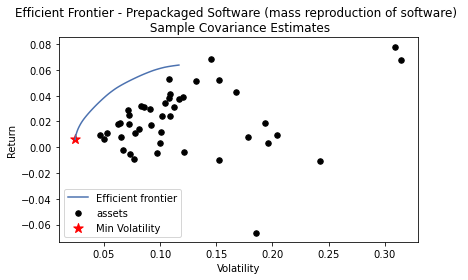

In [17]:
SIC = SIC_list[0]
    
industry_name = SIC_desc[SIC_list.index(SIC)]
    
# get the names of the companies in the other industries
Companies = df[df.SIC == SIC]
Company_list = Companies.index

# get the companies name that match return data and business description data
SET = (set(Company_list) & set(r_selected.index))
LIST = [*SET, ]

mu_sample = mu[LIST]
# get the outliers
outlier = mu_sample[mu_sample>1].index
mu_sample = mu_sample.drop(outlier)
LIST = mu_sample.index

tmp = cov[LIST].T
cov_sample = tmp[LIST]

# perform minimum variance analysis
ef1 = EfficientFrontier(mu_sample, cov_sample, weight_bounds=(0, 0.2))

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef1, ax=ax, show_assets=True)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu_sample, cov_sample, weight_bounds=(0, 0.2))
# min volatility
ef2.min_volatility()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")

# Format
ax.set_title("Efficient Frontier - %s \n Sample Covariance Estimates" %industry_name)
ax.legend()
plt.tight_layout()
plt.savefig('images/Efficient_Frontier_Sample_Covariance_Estimates' + str(industry_name) + '.png', dpi=200, bbox_inches='tight')
plt.show()

##### Min Volatility Portfolio

###### Performance

In [18]:
ef2.portfolio_performance(verbose=True);

Expected annual return: 0.6%
Annual volatility: 2.4%
Sharpe Ratio: -0.57


###### Weights

In [19]:
companies = []
weights = []
for company, weight in ef2.clean_weights().items():
    if weight != 0:
        companies.append(company)
        weights.append(weight)
        
dic = {'Company_Name':companies,'Weight':weights}
min_vol = pd.DataFrame(dic)
min_vol.to_csv("data/min_vol_sample_Prepackaged_Software.csv", index = False)

In [20]:
pd.read_csv("data/min_vol_sample_Prepackaged_Software.csv")

,Company_Name,Weight
0,"BLACK KNIGHT, INC.",0.20000
1,QUMU CORP,0.05153
2,"ZEDGE, INC.",0.01792
3,MAJESCO,0.01906
4,COMMVAULT SYSTEMS INC,0.07381
5,ORACLE CORP,0.09170
6,"QUALYS, INC.",0.06668
7,MICROSTRATEGY INC,0.02160
8,AWARE INC /MA/,0.20000
9,"AVID TECHNOLOGY, INC.",0.00129


#### Crude Petroleum and Natural Gas
When we conduct the same analysis, there is no weight shown. Efficient frontier cannot be found.

#### Real Estate Investment Trusts

In [22]:
SIC = SIC_list[2]
    
industry_name = SIC_desc[SIC_list.index(SIC)]
    
# get the names of the companies in the other industries
Companies = df[df.SIC == SIC]
Company_list = Companies.index

# get the companies name that match return data and business description data
SET = (set(Company_list) & set(r_selected.index))
LIST = [*SET, ]

mu_sample = mu[LIST]
# get the outliers
outlier = mu_sample[mu_sample>1].index
mu_sample = mu_sample.drop(outlier)
LIST = mu_sample.index

tmp = cov[LIST].T
cov_sample = tmp[LIST]

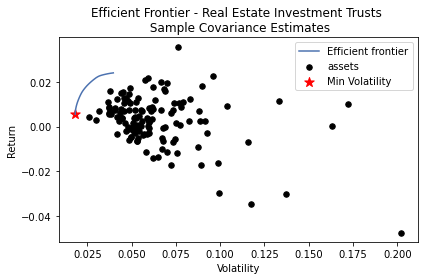

In [23]:
# perform minimum variance analysis
ef1 = EfficientFrontier(mu_sample, cov_sample, weight_bounds=(0, 0.2))

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef1, ax=ax, show_assets=True)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu_sample, cov_sample, weight_bounds=(0, 0.2))
# min volatility
ef2.min_volatility()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")

# Format
ax.set_title("Efficient Frontier - %s \n Sample Covariance Estimates" %industry_name)
ax.legend()
plt.tight_layout()
plt.savefig('images/Efficient_Frontier_Sample_Covariance_Estimates' + str(industry_name) + '.png', dpi=200, bbox_inches='tight')
plt.show()

##### Min Volatility Portfolio

###### Performance

In [24]:
ef2.portfolio_performance(verbose=True);

Expected annual return: 0.5%
Annual volatility: 1.8%
Sharpe Ratio: -0.80


###### Weights

In [25]:
companies = []
weights = []
for company, weight in ef2.clean_weights().items():
    if weight != 0:
        companies.append(company)
        weights.append(weight)
        
dic = {'Company_Name':companies,'Weight':weights}
min_vol = pd.DataFrame(dic)
min_vol.to_csv("data/min_vol_sample_Real_Estate_Investment_Trusts.csv", index = False)

In [26]:
pd.read_csv("data/min_vol_sample_Real_Estate_Investment_Trusts.csv")

,Company_Name,Weight
0,CIM COMMERCIAL TRUST CORP,0.05461
1,"MANHATTAN BRIDGE CAPITAL, INC",0.01483
2,LADDER CAPITAL CORP,0.04420
3,EQUITY COMMONWEALTH,0.20000
4,BRT APARTMENTS CORP.,0.01724
5,PUBLIC STORAGE,0.10938
6,GREAT AJAX CORP.,0.20000
7,ALEXANDERS INC,0.02285
8,IMPAC MORTGAGE HOLDINGS INC,0.05108
9,NEW YORK MORTGAGE TRUST INC,0.02084


#### State Commercial Banks (commercial banking)

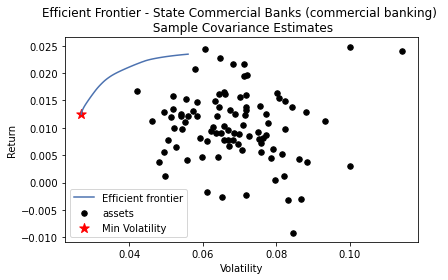

In [27]:
SIC = SIC_list[3]
    
industry_name = SIC_desc[SIC_list.index(SIC)]
    
# get the names of the companies in the other industries
Companies = df[df.SIC == SIC]
Company_list = Companies.index

# get the companies name that match return data and business description data
SET = (set(Company_list) & set(r_selected.index))
LIST = [*SET, ]

mu_sample = mu[LIST]
# get the outliers
outlier = mu_sample[mu_sample>1].index
mu_sample = mu_sample.drop(outlier)
LIST = mu_sample.index

tmp = cov[LIST].T
cov_sample = tmp[LIST]

# perform minimum variance analysis
ef1 = EfficientFrontier(mu_sample, cov_sample, weight_bounds=(0, 0.2))

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef1, ax=ax, show_assets=True)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu_sample, cov_sample, weight_bounds=(0, 0.2))
# min volatility
ef2.min_volatility()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")

# Format
ax.set_title("Efficient Frontier - %s \n Sample Covariance Estimates" %industry_name)
ax.legend()
plt.tight_layout()
plt.savefig('images/Efficient_Frontier_Sample_Covariance_Estimates' + str(industry_name) + '.png', dpi=200, bbox_inches='tight')
plt.show()

##### Min Volatility Portfolio

###### Performance

In [28]:
ef2.portfolio_performance(verbose=True);

Expected annual return: 1.2%
Annual volatility: 2.7%
Sharpe Ratio: -0.28


###### Weights

In [29]:
companies = []
weights = []
for company, weight in ef2.clean_weights().items():
    if weight != 0:
        companies.append(company)
        weights.append(weight)
        
dic = {'Company_Name':companies,'Weight':weights}
min_vol = pd.DataFrame(dic)
min_vol.to_csv("data/min_vol_sample_State_Commercial_Banks.csv", index = False)

In [30]:
pd.read_csv("data/min_vol_sample_State_Commercial_Banks.csv")

,Company_Name,Weight
0,MACKINAC FINANCIAL CORP /MI/,0.02478
1,FIRST COMMUNITY CORP /SC/,0.05076
2,CITIZENS & NORTHERN CORP,0.05375
3,VILLAGE BANK & TRUST FINANCIAL CORP.,0.13994
4,GUARANTY FEDERAL BANCSHARES INC,0.17724
5,BANK OF NEW YORK MELLON CORP,0.09533
6,"RELIANT BANCORP, INC.",0.12273
7,"CAROLINA TRUST BANCSHARES, INC.",0.11786
8,BANK OF THE JAMES FINANCIAL GROUP INC,0.00178
9,"FAUQUIER BANKSHARES, INC.",0.02143
